Neccessray Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import plotly.express as px

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from sklearn.decomposition import PCA
from random import randint
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
df = pd.read_csv("/content/weather_history_bangladesh.csv")

Preview the dataset

In [ ]:
df.head()

,date,time,temperature_fahrenheit,dew_point_fahrenheit,humidity_percentage,wind,wind_speed_mph,wind_gust_mph,pressure_in,precip._in,condition
0,1/1/23,0:00:00,66,59,78,CALM,0,0,30.06,0,Fog
1,1/1/23,0:30:00,66,59,78,CALM,0,0,30.03,0,Fog
2,1/1/23,1:00:00,66,61,83,CALM,0,0,30.03,0,Fog
3,1/1/23,1:30:00,64,61,88,CALM,0,0,30.03,0,Fog
4,1/1/23,2:00:00,64,61,88,CALM,0,0,30.03,0,Fog


Check the dataset informations

In [ ]:
df.shape

(2917, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    2917 non-null   object 
 1   time                    2917 non-null   object 
 2   temperature_fahrenheit  2917 non-null   int64  
 3   dew_point_fahrenheit    2917 non-null   int64  
 4   humidity_percentage     2917 non-null   object 
 5   wind                    2914 non-null   object 
 6   wind_speed_mph          2917 non-null   int64  
 7   wind_gust_mph           2917 non-null   int64  
 8   pressure_in             2917 non-null   float64
 9   precip._in              2917 non-null   int64  
 10  condition               2917 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 250.8+ KB


In [ ]:
df.isnull().sum()

,0
date,0
time,0
temperature_fahrenheit,0
dew_point_fahrenheit,0
humidity_percentage,0
wind,3
wind_speed_mph,0
wind_gust_mph,0
pressure_in,0
precip._in,0


In [ ]:
df['wind'].fillna(0, inplace=True)

In [ ]:
df.isnull().sum()

,0
date,0
time,0
temperature_fahrenheit,0
dew_point_fahrenheit,0
humidity_percentage,0
wind,0
wind_speed_mph,0
wind_gust_mph,0
pressure_in,0
precip._in,0


Data Analysis

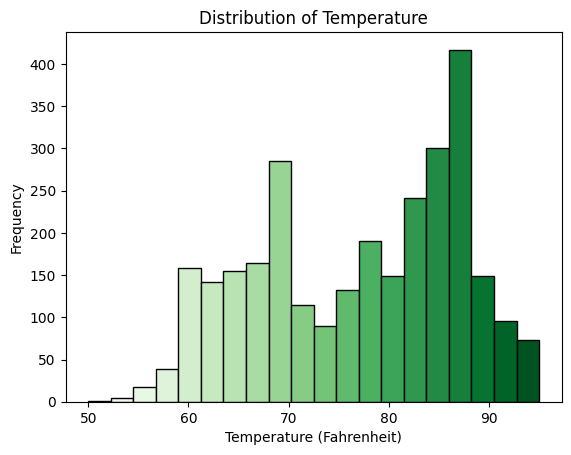

In [ ]:
n_bins = 20
n, bins, patches = plt.hist(df['temperature_fahrenheit'], bins=n_bins, color='blue', edgecolor='black')
for i in range(n_bins):
    patches[i].set_facecolor(plt.cm.Greens(i / n_bins))
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Frequency')
plt.show()

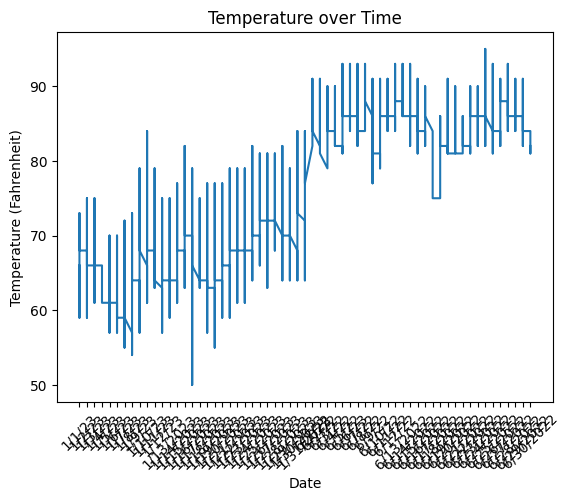

In [ ]:
plt.plot(df['date'], df['temperature_fahrenheit'])
plt.title('Temperature over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (Fahrenheit)')
plt.xticks(rotation=45)
plt.show()

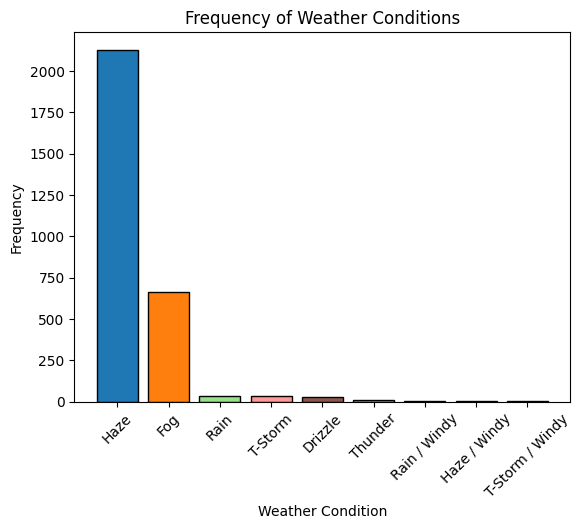

In [ ]:
condition_counts = df['condition'].value_counts()

bars = plt.bar(condition_counts.index, condition_counts.values, edgecolor='black')

colors = plt.cm.tab20(np.linspace(0, 1, len(bars)))
for i, bar in enumerate(bars):
    bar.set_facecolor(colors[i])

plt.title('Frequency of Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


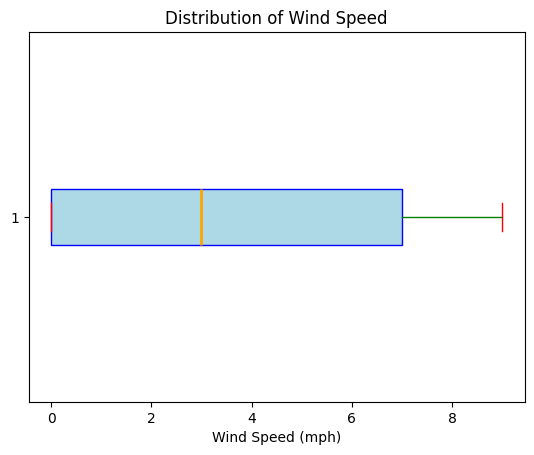

In [ ]:
plt.boxplot(
    df['wind_speed_mph'],
    vert=False,
    patch_artist=True,
    boxprops=dict(color="blue", facecolor="lightblue"),
    whiskerprops=dict(color="green"),
    capprops=dict(color="red"),
    medianprops=dict(color="orange", linewidth=2),
    flierprops=dict(marker='o', color='purple', alpha=0.5))
plt.title('Distribution of Wind Speed')
plt.xlabel('Wind Speed (mph)')
plt.show()

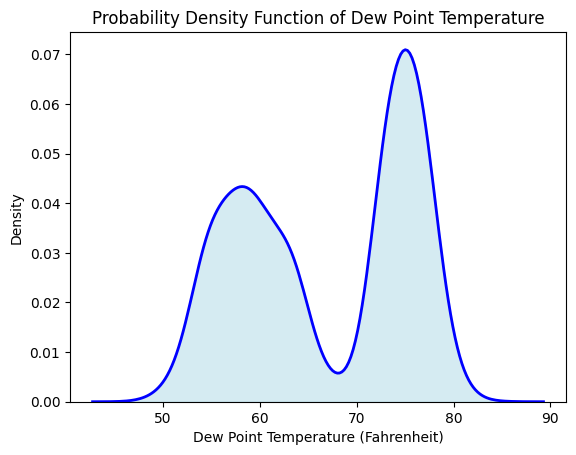

In [ ]:
kde = sns.kdeplot(df['dew_point_fahrenheit'], color='blue', linewidth=2)
x, y = kde.get_lines()[0].get_data()
plt.fill_between(x, y, color='lightblue', alpha=0.5)

plt.title('Probability Density Function of Dew Point Temperature')
plt.xlabel('Dew Point Temperature (Fahrenheit)')
plt.show()

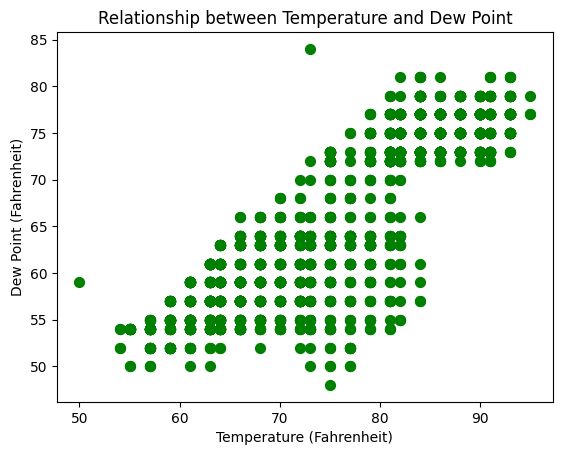

In [ ]:
plt.scatter(
    df['temperature_fahrenheit'],
    df['dew_point_fahrenheit'],
    color='green', s=50, marker='o' )
plt.title('Relationship between Temperature and Dew Point')
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Dew Point (Fahrenheit)')
plt.show()

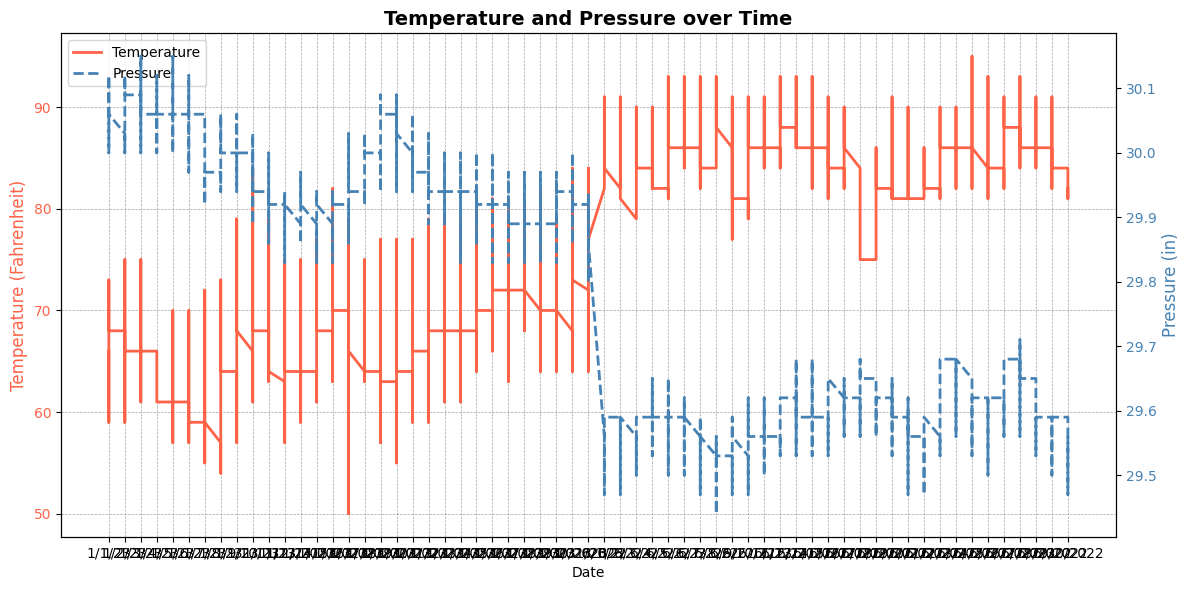

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

color_temp = '#FF6347'
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (Fahrenheit)', color=color_temp, fontsize=12)
ax1.plot(df['date'], df['temperature_fahrenheit'], color=color_temp, linestyle='-', linewidth=2, label='Temperature')
ax1.tick_params(axis='y', labelcolor=color_temp)

ax1.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

ax2 = ax1.twinx()
color_pres = '#4682B4'
ax2.set_ylabel('Pressure (in)', color=color_pres, fontsize=12)
ax2.plot(df['date'], df['pressure_in'], color=color_pres, linestyle='--', linewidth=2, label='Pressure')
ax2.tick_params(axis='y', labelcolor=color_pres)

plt.title('Temperature and Pressure over Time', fontsize=14, fontweight='bold')
fig.tight_layout()

lines_temp, labels_temp = ax1.get_legend_handles_labels()
lines_pres, labels_pres = ax2.get_legend_handles_labels()
ax1.legend(lines_temp + lines_pres, labels_temp + labels_pres, loc='upper left')

plt.xticks(rotation=90)
plt.show()



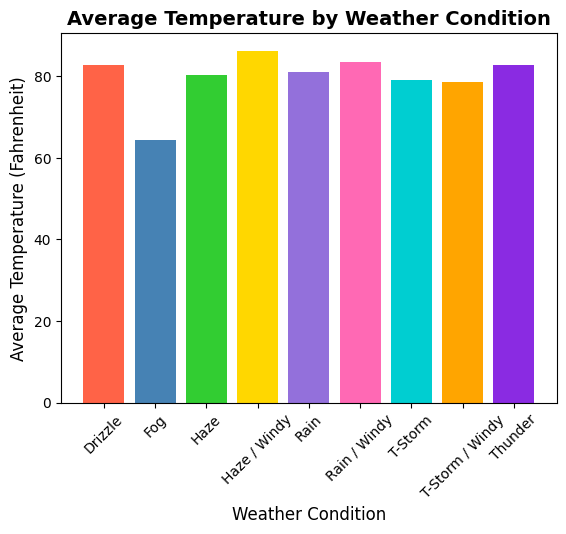

In [ ]:
avg_temp_by_condition = df.groupby('condition')['temperature_fahrenheit'].mean()
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#9370DB', '#FF69B4', '#00CED1', '#FFA500', '#8A2BE2']
plt.bar(avg_temp_by_condition.index, avg_temp_by_condition.values, color=colors[:len(avg_temp_by_condition)])

plt.title('Average Temperature by Weather Condition', fontsize=14, fontweight='bold')
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Average Temperature (Fahrenheit)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.show()


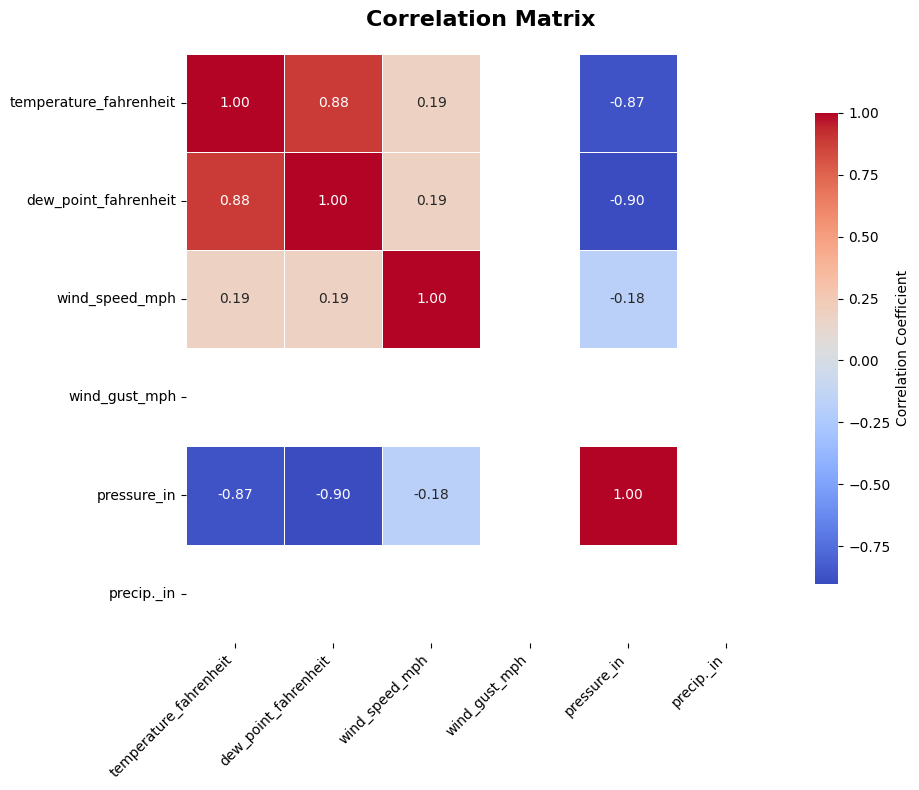

In [ ]:
df['date'] = pd.to_datetime(df['date'])
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"} )

plt.title('Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

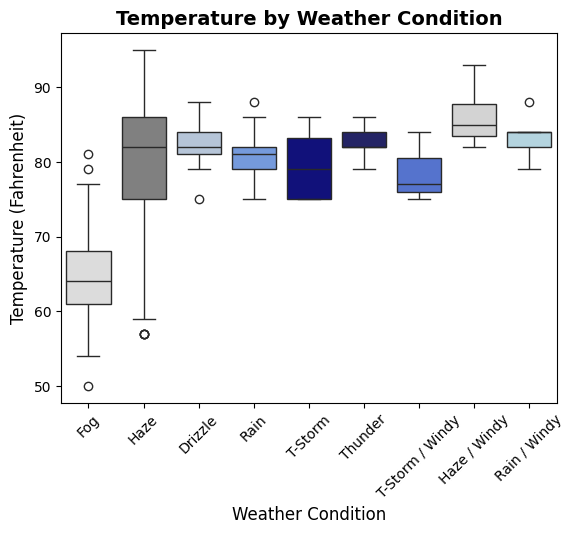

In [ ]:
custom_palette = {
    'Sunny': '#FFA500', 'Rainy': '#4682B4', 'Cloudy': '#A9A9A9', 'Snowy': '#87CEEB',    'Foggy': '#708090',
    'Windy': '#32CD32',  'Haze': '#808080', 'Haze / Windy': '#D3D3D3', 'Rain / Windy': '#ADD8E6',
    'Drizzle': '#B0C4DE', 'Rain': '#6495ED', 'T-Storm': '#00008B', 'Thunder': '#191970',
    'T-Storm / Windy': '#4169E1', 'Fog': '#DCDCDC'}
sns.boxplot(x='condition', y='temperature_fahrenheit', data=df, palette=custom_palette)

plt.title('Temperature by Weather Condition', fontsize=14, fontweight='bold')
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Temperature (Fahrenheit)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.show()


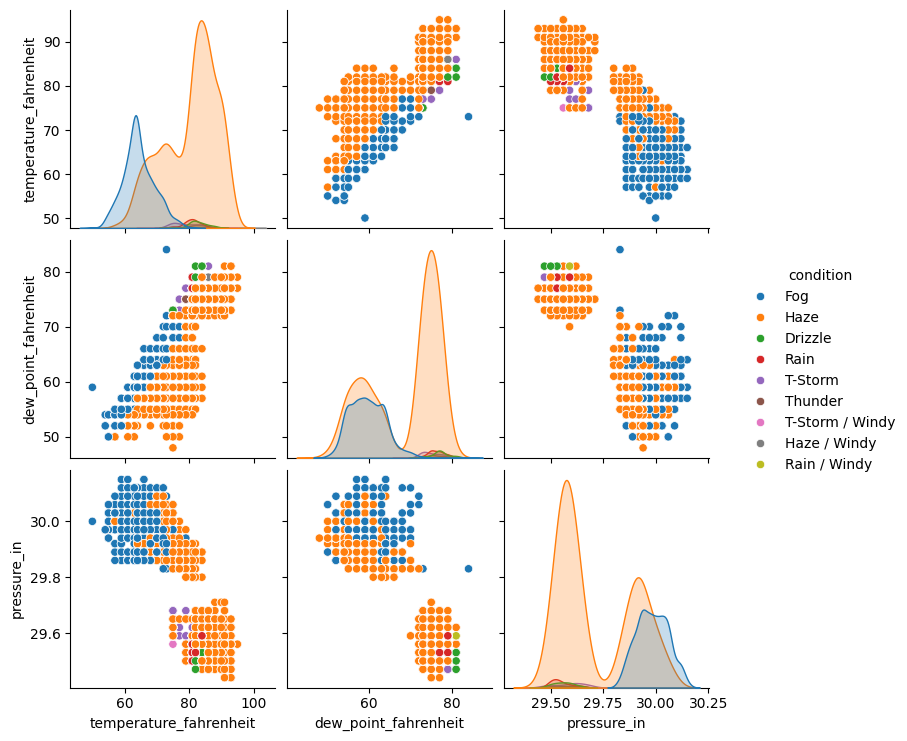

In [ ]:
sns.pairplot(df[['temperature_fahrenheit', 'dew_point_fahrenheit', 'pressure_in', 'condition']], hue='condition')

plt.show()

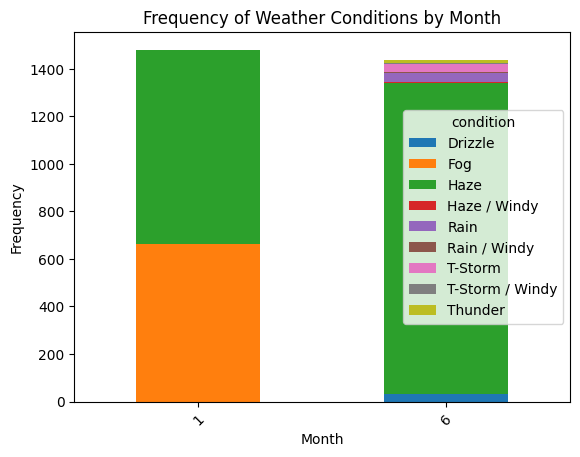

In [ ]:
df['month'] = pd.to_datetime(df['date']).dt.month
condition_by_month = df.groupby(['month', 'condition'])['date'].count().unstack()
condition_by_month.plot(kind='bar', stacked=True)
plt.title('Frequency of Weather Conditions by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

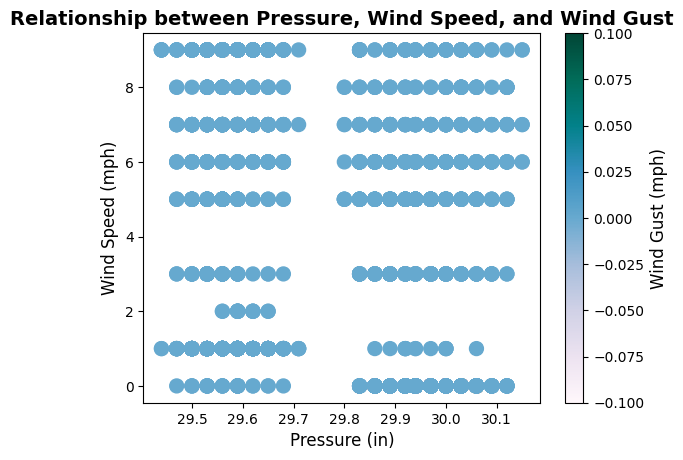

In [ ]:
norm = plt.Normalize(df['wind_gust_mph'].min(), df['wind_gust_mph'].max())
scatter = plt.scatter(df['pressure_in'], df['wind_speed_mph'], c=df['wind_gust_mph'], cmap='PuBuGn', s=100, norm=norm)

plt.title('Relationship between Pressure, Wind Speed, and Wind Gust', fontsize=14, fontweight='bold')
plt.xlabel('Pressure (in)', fontsize=12)
plt.ylabel('Wind Speed (mph)', fontsize=12)
cbar = plt.colorbar(scatter)
cbar.set_label('Wind Gust (mph)', fontsize=12)
plt.show()

In [ ]:
fig = px.line(df, x='date', y=['temperature_fahrenheit', 'dew_point_fahrenheit', 'pressure_in'])
fig.update_layout(title='Time Series of Temperature, Dew Point, and Pressure in Dhaka',
                   xaxis_title='Date',
                   yaxis_title='Value',
                   legend_title='Variable')
fig.show()

In [ ]:
fig = px.scatter(df, x='temperature_fahrenheit', y='dew_point_fahrenheit', color='condition', size='pressure_in', hover_name='date')
fig.update_layout(title='Relationship between Pressure, Wind Speed, and Wind Gust by Weather Condition in Dhaka',
                  xaxis_title='Pressure (in)',
                  yaxis_title='Wind Speed (mph)')
fig.show()

Data Preproccessing

Label Encoding

In [ ]:
## Convert the 'wind' column to string type before applying OneHotEncoder
df['wind'] = df['wind'].astype(str)

# Create an instance of the OneHotEncoder class
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Use sparse_output=False for a dense array and handle_unknown='ignore' to avoid errors if new wind values appear in the future.

# Encode the 'wind' column using OneHotEncoder
wind_encoded = onehot_encoder.fit_transform(df[['wind']])

# Create a new DataFrame with the encoded wind column
wind_encoded_df = pd.DataFrame(wind_encoded, columns=onehot_encoder.get_feature_names_out(['wind']))

# Merge the wind_encoded_df with the original DataFrame and drop the original 'wind' column
data = pd.concat([df, wind_encoded_df], axis=1)
data.drop('wind', axis=1, inplace=True)

In [ ]:
# Create an instance of the LabelEncoder class
label_encoder = LabelEncoder()

# Encode the condition column using LabelEncoder
condition_encoded = label_encoder.fit_transform(data['condition'])

# Add the encoded condition column to the original dataframe
data['condition_encoded'] = condition_encoded

# Drop the original condition column
data.drop('condition', axis=1, inplace=True)

Fixing data type (format)

In [ ]:
# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%y', errors='coerce')

# Convert 'time' column to datetime format
data['time'] = data['time'].replace('0:00:00', np.nan)
data['time'] = pd.to_datetime(data['time'], format='%I:%M:%S %p', errors='coerce').dt.time

In [ ]:
data['humidity_percentage'] = data['humidity_percentage'].astype(int)

Finally check the dataset information before data modeling

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    2917 non-null   datetime64[ns]
 1   time                    0 non-null      datetime64[ns]
 2   temperature_fahrenheit  2917 non-null   int64         
 3   dew_point_fahrenheit    2917 non-null   int64         
 4   humidity_percentage     2917 non-null   int64         
 5   wind_speed_mph          2917 non-null   int64         
 6   wind_gust_mph           2917 non-null   int64         
 7   pressure_in             2917 non-null   float64       
 8   precip._in              2917 non-null   int64         
 9   month                   2917 non-null   int32         
 10  wind_0                  2917 non-null   float64       
 11  wind_CALM               2917 non-null   float64       
 12  wind_E                  2917 non-null   float64 

Feature Selection

In [ ]:
X = data.drop(['date', 'time', 'condition_encoded'], axis=1)
y = data['condition_encoded']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Data Modeling & Evaluation

Data Modeling & Evaluation Using Logistic Regression

In [ ]:
lr = LogisticRegression(random_state=42)

# Train the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lr.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.932648401826484
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.91      0.94      0.93       181
           2       0.96      0.97      0.96       660
           3       0.00      0.00      0.00         1
           4       0.20      0.25      0.22         8
           6       0.40      0.18      0.25        11
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         4

    accuracy                           0.93       876
   macro avg       0.31      0.29      0.30       876
weighted avg       0.92      0.93      0.92       876



Data Modeling & Evaluation Using Random Forest Classification

In [ ]:
# Create a random forest classifier
rfc = RandomForestClassifier(random_state=42)

# Train the model on the training data
rfc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rfc.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9417808219178082
Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.10      0.11        10
           1       0.94      0.94      0.94       181
           2       0.96      0.97      0.97       660
           3       0.00      0.00      0.00         1
           4       0.62      1.00      0.76         8
           6       1.00      0.36      0.53        11
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         4

    accuracy                           0.94       876
   macro avg       0.46      0.42      0.41       876
weighted avg       0.94      0.94      0.94       876



Data Modeling & Evaluation Using Support Vector Machine

In [ ]:
# Create a Support Vector Machines classifier
svc = SVC(random_state=42)

# Train the model on the training data
svc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svc.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.8938356164383562
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.80      0.82      0.81       181
           2       0.92      0.96      0.94       660
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         8
           6       0.00      0.00      0.00        11
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         4

    accuracy                           0.89       876
   macro avg       0.21      0.22      0.22       876
weighted avg       0.86      0.89      0.88       876



Principal Component Analysis

In [ ]:
# Perform PCA
pca = PCA(n_components=len(X.columns))
pca.fit(X)
X_pca = pca.transform(X)

# Split the data into train and test sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Create a Random Forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train_pca, y_train_pca)

# Make predictions on the test data
y_pred_pca = rf.predict(X_test_pca)

# Calculate the accuracy score
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)
print('Accuracy:', accuracy_pca)

Accuracy: 0.9372146118721462


Hyperparameter Optimization

In [ ]:
param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(5, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
}

rfc_hype = RandomForestClassifier(random_state=42)

rfc_random = RandomizedSearchCV(estimator=rfc_hype, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)
rfc_random.fit(X_train, y_train)

print('Best parameters:', rfc_random.best_params_)
print('Best score:', rfc_random.best_score_)

Best parameters: {'max_depth': 37, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 102}
Best score: 0.9470839925212138
